# Shapefile para a criação de mapas por RISP (Regiões Integradas de Segurança Pública) do estado do Espírito Santo

**Autores:** Arthur Diego Pereira, Matheus Henrique Malta Valadares, Rafhael de Oliveira Martins.

Para a leitura e criação de base de dados ShapeFile para criação de Mapas, é utilizado a biblioteca GeoPandas, um projeto de código aberto para facilitar o trabalho com dados geoespaciais em python. Ele combina os recursos de pandas e shapely, fornecendo operações geoespaciais em pandas e uma interface de alto nível para múltiplas geometrias. GeoPandas permite que você execute facilmente operações em python que, de outra forma, exigiriam um banco de dados espacial como PostGIS.
- Site Oficial GeoPandas: [GeoPandas](https://geopandas.org/)
- Site Oficial IBGE Malha Municipal: [IBGE Malha Municipal](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html)
- Site Manual IBGE Malha Municipal: [IBGE Manual](https://biblioteca.ibge.gov.br/visualizacao/livros/liv101998.pdf)
- Programa Estado Presente - ES: [Programa Estado Presente](https://sesp.es.gov.br/publicacoes-2)
- Manual do Programa Estado Presente - ES: [Manual Programa Estado Presente](https://sesp.es.gov.br/Media/Sesp/Prog.%20EP/MANUAL%20B%C3%81SICO%20DO%20PROGRAMA%20ESTADO%20PRESENTE%20-%20EIXO%20PROTE%C3%87%C3%83O%20POLICIAL.pdf)

**Objetivo:** Agregar os dados geográficos por RISP do Programa Estado Presente dos municípios do estado do Espírito Santo a partir do ShapeFile IBGE, para criação de base padrão no SASData.

**Link para baixar os arquivos do IBGE Municípios ES:**
https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

In [126]:
# Instalando Bibliotecas
!pip install unidecode -q
!pip install geopandas -q

In [127]:
# importando Bibliotecas
import os
import unidecode
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Apresenta os dados no notebook
%matplotlib inline

In [131]:
# Extrai os arquivos de Malha Municipal direto do site do IBGE
!wget 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/UFs/ES/ES_Municipios_2022.zip'
!unzip ES_Municipios_2022.zip -d ES_Municipios_2022
!rm -rf ES_Municipios_2022.zip

--2024-11-04 16:46:33--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/UFs/ES/ES_Municipios_2022.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409797 (3.3M) [application/zip]
Saving to: ‘ES_Municipios_2022.zip’

ES_Municipios_2022. 100%[===================>]   3.25M  1.15MB/s    in 2.8s    

2024-11-04 16:46:37 (1.15 MB/s) - ‘ES_Municipios_2022.zip’ saved [3409797/3409797]

Archive:  ES_Municipios_2022.zip
 extracting: ES_Municipios_2022/ES_Municipios_2022.cpg  
  inflating: ES_Municipios_2022/ES_Municipios_2022.dbf  
  inflating: ES_Municipios_2022/ES_Municipios_2022.prj  
  inflating: ES_Municipios_2022/ES_Municipios_2022.shp  
  inflating: ES_Municipios_2022/ES_Municipios_2022.shx  


## ShapeFile Municípios do Estado do Espírito Santo

In [132]:
# Variáveis Globais
path_arq = "ES_Municipios_2022/ES_Municipios_2022.shp"

In [134]:
# Leitura do arquivo shapefile (.shp)
gdf = gpd.read_file(path_arq)
gdf

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3200102,Afonso Cláudio,ES,941.188,"POLYGON ((-41.02167 -20.14893, -41.02002 -20.1..."
1,3200136,Águia Branca,ES,454.448,"POLYGON ((-40.74017 -19.02404, -40.74038 -19.0..."
2,3200169,Água Doce do Norte,ES,473.729,"POLYGON ((-41.04399 -18.62669, -41.04398 -18.6..."
3,3200201,Alegre,ES,756.860,"POLYGON ((-41.48776 -20.60596, -41.48743 -20.6..."
4,3200300,Alfredo Chaves,ES,615.677,"POLYGON ((-40.78714 -20.50978, -40.78676 -20.5..."
...,...,...,...,...,...
73,3205101,Viana,ES,312.279,"POLYGON ((-40.40489 -20.36815, -40.40491 -20.3..."
74,3205150,Vila Pavão,ES,433.257,"POLYGON ((-40.53558 -18.60442, -40.53543 -18.6..."
75,3205176,Vila Valério,ES,470.343,"POLYGON ((-40.24231 -18.98558, -40.26389 -19.0..."
76,3205200,Vila Velha,ES,210.225,"MULTIPOLYGON (((-40.32212 -20.32513, -40.32185..."


### 1 - Verificando base ShapeFile IBGE

In [135]:
# Verificando estruturando
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     object  
 1   NM_MUN    78 non-null     object  
 2   SIGLA_UF  78 non-null     object  
 3   AREA_KM2  78 non-null     float64 
 4   geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 3.2+ KB


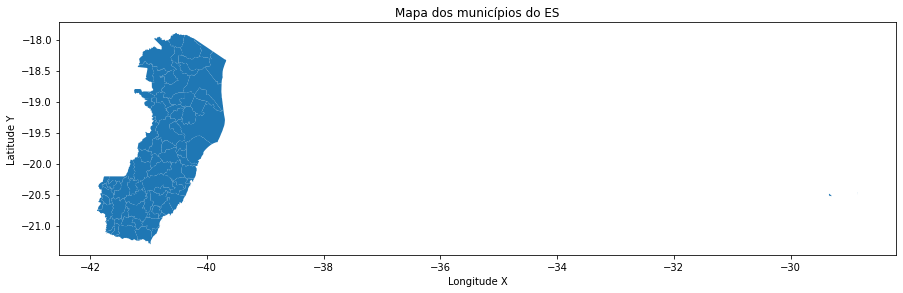

In [136]:
# Visualizando o mapa do ES
fig, ax = plt.subplots(figsize=(15, 7))
gdf.plot(ax=ax)
plt.title("Mapa dos municípios do ES")
plt.xlabel("Longitude X")
plt.ylabel("Latitude Y")
plt.show()

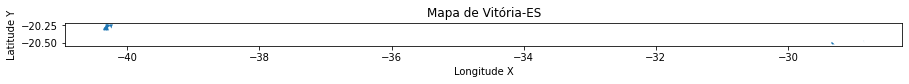

In [137]:
# Visualizando o município de Vitória-ES
fig, ax = plt.subplots(figsize=(15, 8))
gdf.loc[gdf["CD_MUN"] == "3205309"].plot(ax=ax)
plt.title("Mapa de Vitória-ES")
plt.xlabel("Longitude X")
plt.ylabel("Latitude Y")
plt.show()

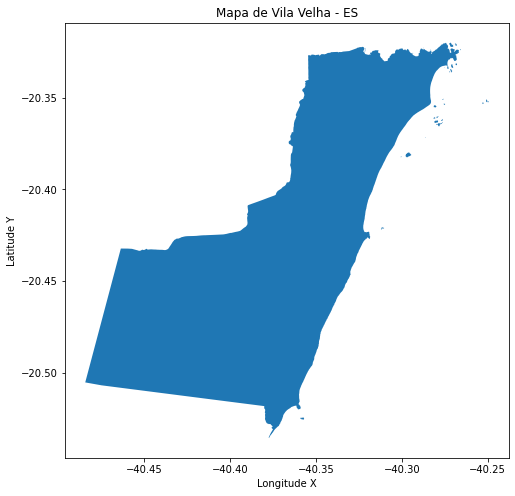

In [138]:
# Visualizando o município de Vila Velha - ES
fig, ax = plt.subplots(figsize=(15, 8))
gdf.loc[gdf["CD_MUN"] == "3205200"].plot(ax=ax)
plt.title("Mapa de Vila Velha - ES")
plt.xlabel("Longitude X")
plt.ylabel("Latitude Y")
plt.show()

In [139]:
# Calculando o centroide e armazenando em uma nova coluna 'centroid' no GeoDataFrame
gdf['centroid'] = gdf['geometry'].centroid
gdf

/opt/cloudera/jupyterhub/lib64/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,centroid
0,3200102,Afonso Cláudio,ES,941.188,"POLYGON ((-41.02167 -20.14893, -41.02002 -20.1...",POINT (-41.12651 -20.08943)
1,3200136,Águia Branca,ES,454.448,"POLYGON ((-40.74017 -19.02404, -40.74038 -19.0...",POINT (-40.74951 -18.97033)
2,3200169,Água Doce do Norte,ES,473.729,"POLYGON ((-41.04399 -18.62669, -41.04398 -18.6...",POINT (-40.99676 -18.51665)
3,3200201,Alegre,ES,756.860,"POLYGON ((-41.48776 -20.60596, -41.48743 -20.6...",POINT (-41.51494 -20.71950)
4,3200300,Alfredo Chaves,ES,615.677,"POLYGON ((-40.78714 -20.50978, -40.78676 -20.5...",POINT (-40.82706 -20.56390)
...,...,...,...,...,...,...
73,3205101,Viana,ES,312.279,"POLYGON ((-40.40489 -20.36815, -40.40491 -20.3...",POINT (-40.51274 -20.40105)
74,3205150,Vila Pavão,ES,433.257,"POLYGON ((-40.53558 -18.60442, -40.53543 -18.6...",POINT (-40.62716 -18.61424)
75,3205176,Vila Valério,ES,470.343,"POLYGON ((-40.24231 -18.98558, -40.26389 -19.0...",POINT (-40.32951 -18.96659)
76,3205200,Vila Velha,ES,210.225,"MULTIPOLYGON (((-40.32212 -20.32513, -40.32185...",POINT (-40.37826 -20.43408)


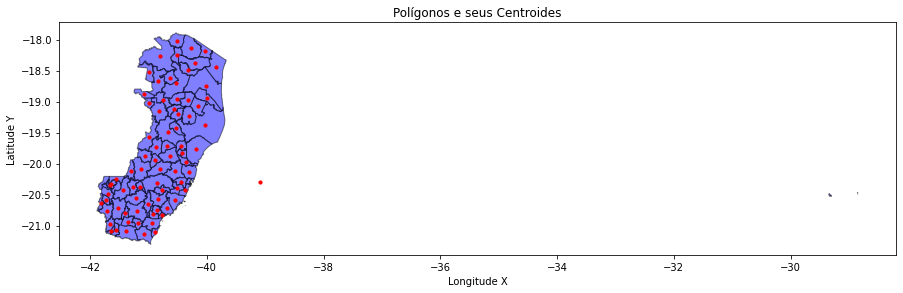

In [140]:
# Visualizando o mapa do ES com o centroide dos municípios
fig, ax = plt.subplots(figsize=(15, 7))

# Plote os polígonos do GeoDataFrame
gdf.plot(ax=ax, alpha=0.5, color='blue', edgecolor='k')

# Plote os centroides como pontos vermelhos
gdf['centroid'].plot(ax=ax, markersize=10, color='red', label='Centroid')
plt.title('Polígonos e seus Centroides')
plt.xlabel("Longitude X")
plt.ylabel("Latitude Y")
plt.show()

Percebe-se que o município de Vitória-ES possui ilhas vinculadas ao município, e com isso o polígono é considerado como um multipolígono, onde ao calcular o centroide, o mesmo é atribui um centroide com localização dentro do mar justamente por conta da distância entre o polígono do município de Vitória-ES e as ilhas, onde possui cerca de 1.200 Km de distância entre Vitória-ES e a Ilha.

- Site da Marinha explicando sobre a proteção e pesquisas realizadas nas ilhas: [Ilhas Martin Vaz e Trindade](https://www.marinha.mil.br/agenciadenoticias/ilhas-martin-vaz-e-trindade-presenca-da-marinha-garante-soberania-territorial-e)

### 2 - Preparação do GeoDataframe para base de RISP do Program Estado Presente

In [141]:
# Leitura da base de RISP para junção com os dados do ShapeFile
df_risp = pd.read_csv("RISP_2.csv", sep=";")
df_risp

,CD_MUN,NM_MUN,CD_RISP,NM_RISP
0,3201308,Cariacica,RISP 1,Metropolitana
1,3202405,Guarapari,RISP 1,Metropolitana
2,3205002,Serra,RISP 1,Metropolitana
3,3205101,Viana,RISP 1,Metropolitana
4,3205200,Vila Velha,RISP 1,Metropolitana
...,...,...,...,...
73,3204500,Santa Leopoldina,RISP 5,Serrana
74,3204559,Santa Maria de Jetibá,RISP 5,Serrana
75,3204609,Santa Teresa,RISP 5,Serrana
76,3204955,São Roque do Canaã,RISP 5,Serrana


In [142]:
# Verificando estrutura dos dados
df_risp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CD_MUN   78 non-null     int64 
 1   NM_MUN   78 non-null     object
 2   CD_RISP  78 non-null     object
 3   NM_RISP  78 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [143]:
# Convertendo int para string
df_risp["CD_MUN_2"] = df_risp["CD_MUN"].astype("string")

In [144]:
# Verificando estrutura dos dados
df_risp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CD_MUN    78 non-null     int64 
 1   NM_MUN    78 non-null     object
 2   CD_RISP   78 non-null     object
 3   NM_RISP   78 non-null     object
 4   CD_MUN_2  78 non-null     string
dtypes: int64(1), object(3), string(1)
memory usage: 3.2+ KB


In [145]:
# Verificando primeiros dados
df_risp.head()

,CD_MUN,NM_MUN,CD_RISP,NM_RISP,CD_MUN_2
0,3201308,Cariacica,RISP 1,Metropolitana,3201308
1,3202405,Guarapari,RISP 1,Metropolitana,3202405
2,3205002,Serra,RISP 1,Metropolitana,3205002
3,3205101,Viana,RISP 1,Metropolitana,3205101
4,3205200,Vila Velha,RISP 1,Metropolitana,3205200


In [146]:
# Verificando últimos dados
df_risp.tail()

,CD_MUN,NM_MUN,CD_RISP,NM_RISP,CD_MUN_2
73,3204500,Santa Leopoldina,RISP 5,Serrana,3204500
74,3204559,Santa Maria de Jetibá,RISP 5,Serrana,3204559
75,3204609,Santa Teresa,RISP 5,Serrana,3204609
76,3204955,São Roque do Canaã,RISP 5,Serrana,3204955
77,3205069,Venda Nova do Imigrante,RISP 5,Serrana,3205069


In [147]:
# Seleciona campos para a junção
df_risp_2 = df_risp[["CD_MUN_2", "CD_RISP", "NM_RISP"]].copy()
df_risp_2.head()

,CD_MUN_2,CD_RISP,NM_RISP
0,3201308,RISP 1,Metropolitana
1,3202405,RISP 1,Metropolitana
2,3205002,RISP 1,Metropolitana
3,3205101,RISP 1,Metropolitana
4,3205200,RISP 1,Metropolitana


In [148]:
# Junção das RISPs com o Shapefile Original
df_all = gdf.merge(df_risp_2, left_on="CD_MUN", right_on="CD_MUN_2")
df_all

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,centroid,CD_MUN_2,CD_RISP,NM_RISP
0,3200102,Afonso Cláudio,ES,941.188,"POLYGON ((-41.02167 -20.14893, -41.02002 -20.1...",POINT (-41.12651 -20.08943),3200102,RISP 5,Serrana
1,3200136,Águia Branca,ES,454.448,"POLYGON ((-40.74017 -19.02404, -40.74038 -19.0...",POINT (-40.74951 -18.97033),3200136,RISP 4,Noroeste
2,3200169,Água Doce do Norte,ES,473.729,"POLYGON ((-41.04399 -18.62669, -41.04398 -18.6...",POINT (-40.99676 -18.51665),3200169,RISP 4,Noroeste
3,3200201,Alegre,ES,756.860,"POLYGON ((-41.48776 -20.60596, -41.48743 -20.6...",POINT (-41.51494 -20.71950),3200201,RISP 3,Sul
4,3200300,Alfredo Chaves,ES,615.677,"POLYGON ((-40.78714 -20.50978, -40.78676 -20.5...",POINT (-40.82706 -20.56390),3200300,RISP 3,Sul
...,...,...,...,...,...,...,...,...,...
73,3205101,Viana,ES,312.279,"POLYGON ((-40.40489 -20.36815, -40.40491 -20.3...",POINT (-40.51274 -20.40105),3205101,RISP 1,Metropolitana
74,3205150,Vila Pavão,ES,433.257,"POLYGON ((-40.53558 -18.60442, -40.53543 -18.6...",POINT (-40.62716 -18.61424),3205150,RISP 4,Norte
75,3205176,Vila Valério,ES,470.343,"POLYGON ((-40.24231 -18.98558, -40.26389 -19.0...",POINT (-40.32951 -18.96659),3205176,RISP 4,Norte
76,3205200,Vila Velha,ES,210.225,"MULTIPOLYGON (((-40.32212 -20.32513, -40.32185...",POINT (-40.37826 -20.43408),3205200,RISP 1,Metropolitana


In [149]:
# Remove campo desnecessário
df_all.drop(columns="CD_MUN_2", inplace=True)

In [151]:
# Organizando campos
df_all_2 = df_all[['CD_MUN', 'NM_MUN', 'CD_RISP', 'NM_RISP', 'SIGLA_UF', 'AREA_KM2', 'geometry']]
df_all_2.head()

,CD_MUN,NM_MUN,CD_RISP,NM_RISP,SIGLA_UF,AREA_KM2,geometry
0,3200102,Afonso Cláudio,RISP 5,Serrana,ES,941.188,"POLYGON ((-41.02167 -20.14893, -41.02002 -20.1..."
1,3200136,Águia Branca,RISP 4,Noroeste,ES,454.448,"POLYGON ((-40.74017 -19.02404, -40.74038 -19.0..."
2,3200169,Água Doce do Norte,RISP 4,Noroeste,ES,473.729,"POLYGON ((-41.04399 -18.62669, -41.04398 -18.6..."
3,3200201,Alegre,RISP 3,Sul,ES,756.860,"POLYGON ((-41.48776 -20.60596, -41.48743 -20.6..."
4,3200300,Alfredo Chaves,RISP 3,Sul,ES,615.677,"POLYGON ((-40.78714 -20.50978, -40.78676 -20.5..."


In [152]:
# Ordenando dados para a agregação dos dados por RISP
df_all_2 = df_all_2.sort_values(by=['CD_RISP'])
df_all_2

,CD_MUN,NM_MUN,CD_RISP,NM_RISP,SIGLA_UF,AREA_KM2,geometry
77,3205309,Vitória,RISP 1,Metropolitana,ES,97.123,"MULTIPOLYGON (((-40.29020 -20.28757, -40.29024..."
73,3205101,Viana,RISP 1,Metropolitana,ES,312.279,"POLYGON ((-40.40489 -20.36815, -40.40491 -20.3..."
69,3205002,Serra,RISP 1,Metropolitana,ES,547.631,"POLYGON ((-40.28097 -20.03150, -40.28084 -20.0..."
76,3205200,Vila Velha,RISP 1,Metropolitana,ES,210.225,"MULTIPOLYGON (((-40.32212 -20.32513, -40.32185..."
28,3202405,Guarapari,RISP 1,Metropolitana,ES,589.825,"MULTIPOLYGON (((-40.54949 -20.76231, -40.54984..."
...,...,...,...,...,...,...,...
29,3202454,Ibatiba,RISP 5,Sul,ES,240.278,"POLYGON ((-41.50109 -20.20724, -41.48382 -20.2..."
22,3201902,Domingos Martins,RISP 5,Serrana,ES,1229.210,"POLYGON ((-40.69365 -20.18944, -40.69321 -20.1..."
20,3201704,Conceição do Castelo,RISP 5,Serrana,ES,369.778,"POLYGON ((-41.21808 -20.35658, -41.21780 -20.3..."
62,3204559,Santa Maria de Jetibá,RISP 5,Serrana,ES,735.198,"POLYGON ((-40.61617 -20.03337, -40.61646 -20.0..."


In [155]:
# Criando GeoDataFrame para as Regiões do Programa Estado Presente
gdf_risp = df_all_2[['CD_RISP', 'NM_RISP', 'geometry']].copy()
dic = {
    'CD_RISP' : [],
    'NM_RISP' : [],
    'geometry' : []
}

id_ = 1

for risp in gdf_risp['CD_RISP'].unique():
    temp = gdf_risp[gdf_risp['CD_RISP'] == risp]

    dic['CD_RISP'].append(id_)
    dic['NM_RISP'].append(risp)
    dic['geometry'].append(temp.unary_union)

    id_+=1

gdf_risp = gpd.GeoDataFrame(dic)
gdf_risp

del dic

In [156]:
# Verificar estrutura do dataframe
gdf_risp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_RISP   5 non-null      int64   
 1   NM_RISP   5 non-null      object  
 2   geometry  5 non-null      geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [157]:
# Verificando o GeoDataFrame
gdf_risp

,CD_RISP,NM_RISP,geometry
0,1,RISP 1,"MULTIPOLYGON (((-40.54984 -20.76177, -40.54975..."
1,2,RISP 2,"MULTIPOLYGON (((-40.13359 -19.96888, -40.13359..."
2,3,RISP 3,"MULTIPOLYGON (((-41.01035 -21.25255, -41.01090..."
3,4,RISP 4,"POLYGON ((-40.83501 -19.56835, -40.83523 -19.5..."
4,5,RISP 5,"POLYGON ((-41.66894 -20.56712, -41.66905 -20.5..."


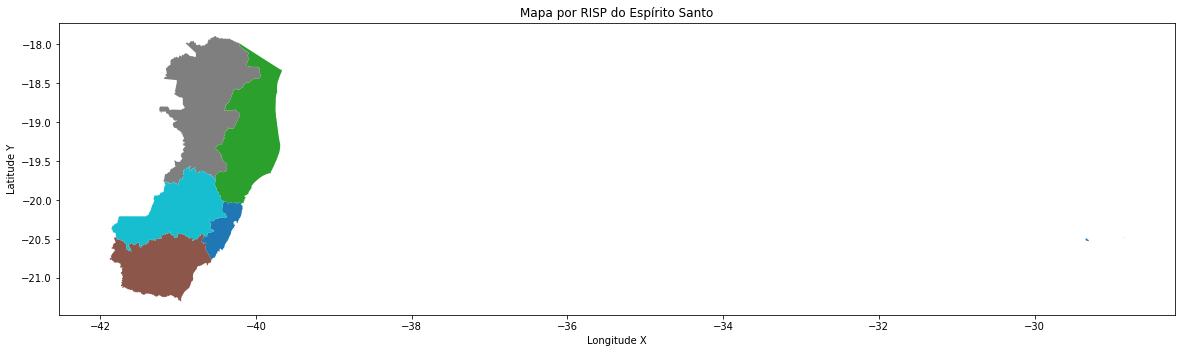

In [158]:
# Visualizando o mapa de região
fig, ax = plt.subplots(figsize=(20, 10))
gdf_risp.plot('NM_RISP', ax=ax)
plt.title("Mapa por RISP do Espírito Santo")
plt.xlabel("Longitude X")
plt.ylabel("Latitude Y")
plt.show()

### 3 - Criando ShapeFile por RISP

In [159]:
# Gera o shapefile
gdf_risp.to_file('SHAPEFILE_RISP_ES')

In [160]:
# Criando arquivo zip ocm o ShapeFile
!zip -r 'SHAPEFILE_RISP_ES.zip' 'SHAPEFILE_RISP_ES'

updating: SHAPEFILE_RISP_ES/ (stored 0%)
updating: SHAPEFILE_RISP_ES/SHAPEFILE_RISP_ES.shp (deflated 24%)
updating: SHAPEFILE_RISP_ES/SHAPEFILE_RISP_ES.shx (deflated 35%)
updating: SHAPEFILE_RISP_ES/SHAPEFILE_RISP_ES.dbf (deflated 87%)
updating: SHAPEFILE_RISP_ES/SHAPEFILE_RISP_ES.cpg (stored 0%)
